# Regression

## Introduction to Regression

Single Linear Regression: One-dimensional Regression  
Multiple Linear Regression: Multi-dimensional Regression  
Ridge Regression: Add L2 Regularization > make large coefficient values smaller  
Lasso Regression: Add L1 Regularization > make small coefficient values to 0(a.k.a. Feature selection)  
ElasticNet: Add L1&L2 Regularization  
Logistic Regression: Seems to Classification

MAE(Mean Absolute Error): mean of absolute value of errors  
RSS(Residual Sum of Error): mean of squared error  

## Gradient Descent

If there are less features, we can use multi-dimensional equation to find regression coefficents. However, as feature get bigger, it's difficult to calculate regression coefficients by equtation. But Gradient Descent(GD) can!  
  
Gradinet Descent: By repetitive calculation, update parameter values to make min error value  

Shape of X: (100, 1)
Shape of y: (100, 1)


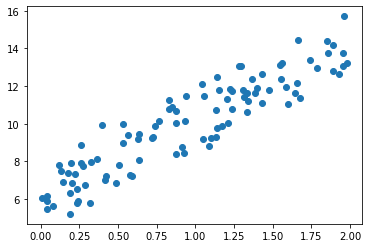

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# we want to make random value from y=4x+6
X = 2*np.random.rand(100,1)
print('Shape of X:', X.shape)
y = 6+4*X + np.random.randn(100,1)
print('Shape of y:', y.shape)

plt.scatter(X,y)

In [56]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [57]:
w1 = np.array([[1,2],[3,4]])
w1.T

array([[1, 3],
       [2, 4]])

In [58]:
np.zeros((1,1))

array([[0.]])

In [59]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)      # number of data
    F = X.shape[1]  # number of feature

    # Initialization w1_updated & w0_updated as same size as w1 & w0 with 0 values
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    y_pred = np.dot(X, w1) + w0   # Calculate prediction matrix
    diff = y - y_pred               # Calculate diff between prediction and actual value
    
    w1_update = (-2/N)*learning_rate*np.dot(X.T, diff)  #shape of w1: (# of features, 1)
    w0_update = (-2/N)*learning_rate*np.sum(diff)       #shape of w0: (1, 1)

    return w1_update, w0_update

def gradient_descent_steps(X, y, iters=10000, learning_rate=0.01):
    
    w1 = np.zeros((X.shape[1],1)) #shape: (# of features, 1)
    w0 = np.zeros((1, 1))         #shape: (1, 1)

    for i in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=learning_rate)
        w1 -= w1_update
        w0 -= w0_update
    
    return w1, w0

In [60]:
w1, w0 = gradient_descent_steps(X, y, iters=1000, learning_rate=0.01)
print('w0: {:4f}'.format(w0[0,0]))
print('w1:')
print(w1)

y_pred = np.dot(X,w1)+w0
cost = get_cost(y, y_pred)
print('Gradient Descent Total Cost: {:4f}'.format(cost))

w0: 6.162031
w1:
[[4.02181364]]
Gradient Descent Total Cost: 0.993478


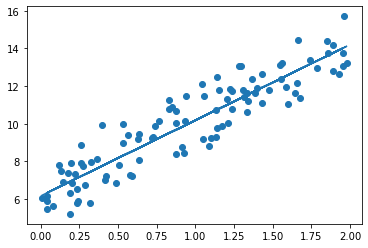

In [61]:
plt.scatter(X,y)
plt.plot(X, y_pred)

### Stochastic Gradient Descent(SGD)

In [62]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=10000, learning_rate=0.01):
    
    w1 = np.zeros((X.shape[1],1)) #shape: (# of features, 1)
    w0 = np.zeros((1, 1))         #shape: (1, 1)
    prev_cost = 100000
    iter_index=0

    for i in range(iters):
        stochastic_random_index = np.random.permutation(X.shape[0]) #Shuffle index of X
        sample_X = X[stochastic_random_index[0:batch_size]]         #Sampling X by batchsize
        sample_y = y[stochastic_random_index[0:batch_size]]         #Sampling y by batchsize

        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=learning_rate)
        w1 -= w1_update
        w0 -= w0_update
    
    return w1, w0

In [63]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000, batch_size=10, learning_rate=0.01)
print('w0: {:4f}'.format(w0[0,0]))
print('w1:')
print(w1)

y_pred = np.dot(X,w1)+w0
cost = get_cost(y, y_pred)
print('Stochastic Gradient Descent Total Cost: {:4f}'.format(cost))

w0: 6.137259
w1:
[[4.00668731]]
Stochastic Gradient Descent Total Cost: 0.995301


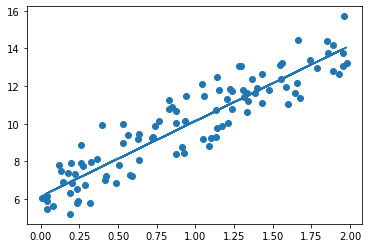

In [64]:
plt.scatter(X,y)
plt.plot(X, y_pred)

In [79]:
# we want to make random value from y= 5w1 - 4w2 + 4
X = np.concatenate((2*np.random.rand(1000,1), 3*np.random.rand(1000,1)), axis=1)
print('Shape of X:', X.shape)
w = np.array([[5],[-4]])
y = 4 + np.dot(X,w) + np.random.randn(1000,1)
print('Shape of y:', y.shape)


Shape of X: (1000, 2)
Shape of y: (1000, 1)


In [80]:
w1, w0 = gradient_descent_steps(X, y, iters=5000, learning_rate=0.05)
print('w0: {:4f}'.format(w0[0,0]))
print('w1:')
print(w1)

y_pred = np.dot(X,w1)+w0
cost = get_cost(y, y_pred)
print('Gradient Descent Total Cost: {:4f}'.format(cost))

w0: 3.888133
w1:
[[ 5.01725428]
 [-3.94735334]]
Gradient Descent Total Cost: 0.974396


## Boston Housing Price Prediction Example